# Myopia | Unsupervised Machine Learning

In [34]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

## Part 1 | Prepare the Data

In [35]:
# Import the data
data = pd.read_csv('Resources/myopia.csv')
data.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [36]:
# checking the size/shape of the data set
data.shape

(618, 15)

In [37]:
# Remove Myopic column from dataset, set the X value
X = data.drop('MYOPIC', axis = 1)
X.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [38]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled[0:5])

[[-0.42021911 -1.3639169  -0.89286146  0.48378402 -0.28144315 -1.0197916
   4.1506609   1.69744958 -0.68931054 -0.67299591  0.18405806  0.49830393
   0.98713773  1.0032415 ]
 [-0.42021911 -0.30861224 -0.1718398   0.53591028 -0.96799728 -0.13076253
  -0.99889822 -0.91206246 -0.36187479 -0.22140908 -0.34093217 -0.87508755
   0.98713773  1.0032415 ]
 [-0.42021911  0.60438629 -0.00997682 -0.5066285  -0.17781207  0.21580879
   0.25709181 -0.91206246 -0.03443904 -0.67299591  0.18405806 -0.75023378
  -1.01302987 -0.99676897]
 [-0.42021911 -0.4413248  -0.43670267  1.23093648  0.4569273  -0.97458715
   0.75948782  2.6760166  -0.68931054 -0.67299591 -0.86592239  0.68558458
  -1.01302987  1.0032415 ]
 [-1.82397807 -0.16630592  1.16720365  0.42296952 -0.56642745  1.18017813
   0.25709181 -0.91206246 -0.68931054 -0.67299591 -0.86592239 -1.37450264
   0.98713773 -0.99676897]]


We have 14 dimensions in this data set with 618 samples worth of data.

## Part 2 | Apply Dimensionality Reduction

Determine what is the best PCA model variance percentage

In [39]:
# Testing other PCA model percentages
# Performing Dimensionality reduction with PCA....using a PCA model preserving 80% of the variance.
pca = PCA(n_components=0.8)

# Get the principal components for the X_scaled data
pca_transformed = pca.fit_transform(X_scaled)

# Fetch the explained variance
pca.explained_variance_ratio_

array([0.21177355, 0.15659716, 0.08688023, 0.08301762, 0.07584858,
       0.06997878, 0.06486986, 0.06377808])

In [40]:
# Performing Dimensionality reduction with PCA....using a PCA model preserving 90% of the variance.
pca = PCA(n_components=0.9)

# Get the principal components for the X_scaled data
pca_transformed = pca.fit_transform(X_scaled)

# Fetch the explained variance
pca.explained_variance_ratio_

array([0.21177355, 0.15659716, 0.08688023, 0.08301762, 0.07584858,
       0.06997878, 0.06486986, 0.06377808, 0.05393666, 0.05205566])

In [41]:
# Testing other PCA model percentages
# Performing Dimensionality reduction with PCA....using a PCA model preserving 99% of the variance.
pca = PCA(n_components=0.99)

# Get the principal components for the X_scaled data
pca_transformed = pca.fit_transform(X_scaled)

# Fetch the explained variance
pca.explained_variance_ratio_

array([0.21177355, 0.15659716, 0.08688023, 0.08301762, 0.07584858,
       0.06997878, 0.06486986, 0.06377808, 0.05393666, 0.05205566,
       0.04286506, 0.03839767])

As the Hint in the instructions suggested, it was best for this module for us to utilize the 90% preservation of the explained variance in the dimentionality reduction; we had 10 dimensions. 
When we used 80%; we were left with 8 dimensions; the 99% we had 12 dimensions. 

In [42]:
# Performing Dimensionality reduction with PCA....using a PCA model preserving 90% of the variance.
pca = PCA(n_components=0.9)

# Get the principal components for the X_scaled data
pca_transformed = pca.fit_transform(X_scaled)

# Fetch the explained variance
pca.explained_variance_ratio_

array([0.21177355, 0.15659716, 0.08688023, 0.08301762, 0.07584858,
       0.06997878, 0.06486986, 0.06377808, 0.05393666, 0.05205566])

In [43]:
# Run the t-SNE
tsne = TSNE(learning_rate=75)

# Reduce the dimensions
tsne_features = tsne.fit_transform(pca_transformed)

c:\Users\mblazevic\Anaconda3\envs\mlenv\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


In [44]:
# Determine the new size/shape
tsne_features.shape

(618, 2)

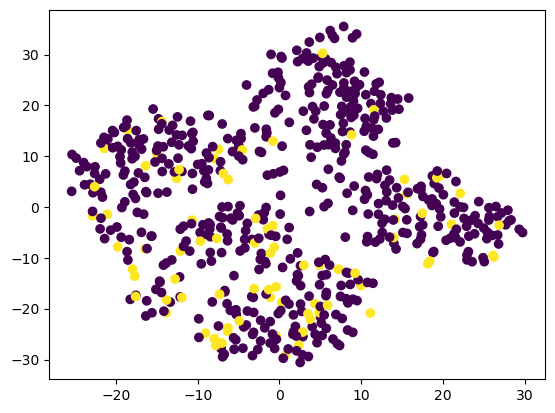

In [45]:
# Create a scatter plot
import matplotlib 
plt.scatter(tsne_features[:,0], tsne_features[:,1], c=data["MYOPIC"])

## Part 3 | Perform a Cluster Analysis with K-Means

Create an elbow plot to determine number of clusters

In [46]:
# For loop to determine inertia for K between 1 - 10
inertia = []
k = list(range(1,11))

# Calculate inertia for range
for i in k:
    km = KMeans(n_clusters = i, random_state = 0)
    km.fit(pca_transformed)
    inertia.append(km.inertia_)

# Create the elbow data
elbow_data = {"k": k, "inertia": inertia}
elbow_df = pd.DataFrame(elbow_data)
elbow_df.head()

c:\Users\mblazevic\Anaconda3\envs\mlenv\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  "KMeans is known to have a memory leak on Windows "


,k,inertia
0,1,7948.905345
1,2,6794.415695
2,3,6031.097742
3,4,5662.587617
4,5,5376.410589


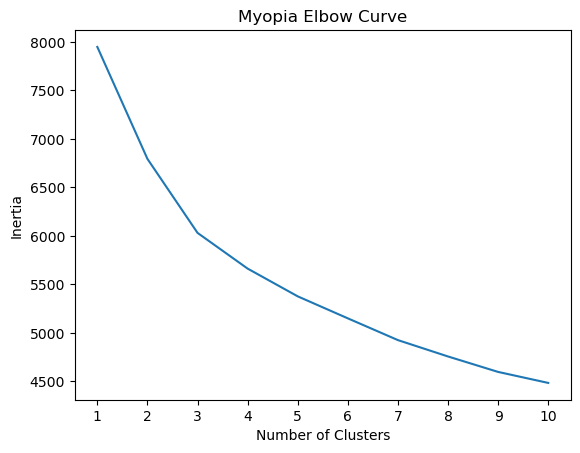

In [47]:
# Plot the elbow curve
plt.plot(elbow_df['k'], elbow_df['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Myopia Elbow Curve')
plt.show()

Looks like there are 10 different components; and according to the elbow curve; there should be 3 clusters.

In [48]:
# Data frame for the transformed PCA data used in modeling
columns = []

for i in range (len(pca.components_)):
    columns.append(i+1)

pca_df = pd.DataFrame(pca_transformed, columns=columns)
pca_df['class'] = km.labels_
pca_df.head()

,1,2,3,4,5,6,7,8,9,10,class
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144,6
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031,2
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336,8
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400,6
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183,2


In [49]:
# Initialize K-Means with the 3 clusters
model = KMeans(n_clusters=3, random_state=0)

# Train the model
model.fit(pca_df)

# Predict the clusters
predictions = model.predict(pca_df)

# Add clusters to the DF
pca_df['class'] = model.labels_

c:\Users\mblazevic\Anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
c:\Users\mblazevic\Anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


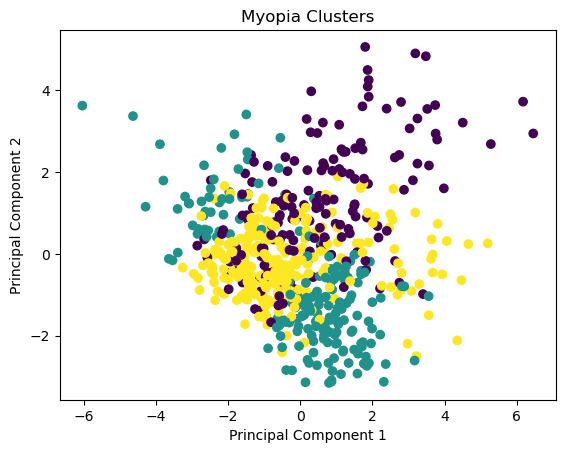

In [50]:
# Create a scatter plot
plt.scatter (x=pca_df[1], y=pca_df[2], c=pca_df['class'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title ('Myopia Clusters')
plt.show()

## Make a Recommendation
After preparing all of the data, applying the dimensionality reduction utilizing our PCA method, futher focusing the data by using a t-SNE method; a cluster analysis was complete.  When doing unsupervised learning on the Myopia data; 3 is the optimal cluster count for our data set. 

When looking at the 3 scatter plots that were created; I don't believe that the t-SNE analysis providing additioanl information; as it appeared that there were 5ish clusters. This could be due to the random noise; or adjustments in the data. 